In [12]:
# Importing libraries 

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Importing data

df_2019 = pd.read_csv('survey_results_public_2019.csv')
df_2019_schema = pd.read_csv('survey_results_schema_2019.csv')

In [3]:
# Filtering the data of Data Scientists and Machine Learning Specialists

df_2019_clean = df_2019.dropna(subset=['DevType'])
df_2019_clean_DS = df_2019_clean[df_2019_clean['DevType'].str.contains('Data scientist or machine learning specialist')]

## Analyzing Languages, Databases, Platforms, WebFrameworks and Frameworks

In [4]:
# Defining a function that performs the cleaning of the data present in a specific column and builds a top 10 ranking plot

def ranking(df_original, columns, legends):
    
    '''
    INPUT:
    df_original - dataframe that contains a column that you want to analyze
    columns - column that you want to analyze -> LanguageWorkedWith for example
    columns - the name you want to show in plot
    title - title plot
    
    OUTPUT:
    A top 10 ranking bar plot
    '''
    
    for i in range(len(columns)):
    
        # Cleaning missing data of column1

        lg_series = df_original[columns[i]].dropna().reset_index().drop('index', axis=1)
        lg_df = pd.DataFrame(lg_series)

        lg = []

        # Separating the column1 information -> Example: 'Python; C' to 'Python' and 'C'

        for j in range(lg_df.shape[0]):
            lgs = lg_df[columns[i]][j].split(';')
            for k in range(len(lgs)):
                lg.append(lgs[k])

        # Counting values of each option

        if i == 0:
            df_language1 = pd.DataFrame(pd.DataFrame(lg)[0].value_counts() / len(lg_df))
            df_language1.columns = [legends[i]]
        else:
            df_language2 = pd.DataFrame(pd.DataFrame(lg)[0].value_counts() / len(lg_df))
            df_language2.columns = [legends[i]]
     
    # Creating subplots
    
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,7))
    fig.tight_layout(pad=10)
    
    df_language1[:10].plot(kind="barh", alpha=0.5, ax=ax1, title=titles[0])
    df_language2[:10].plot(kind="barh", alpha=0.5, ax=ax2, title=titles[1])
    ax1.invert_yaxis()
    ax2.invert_yaxis()
    
    return fig,ax1,ax2

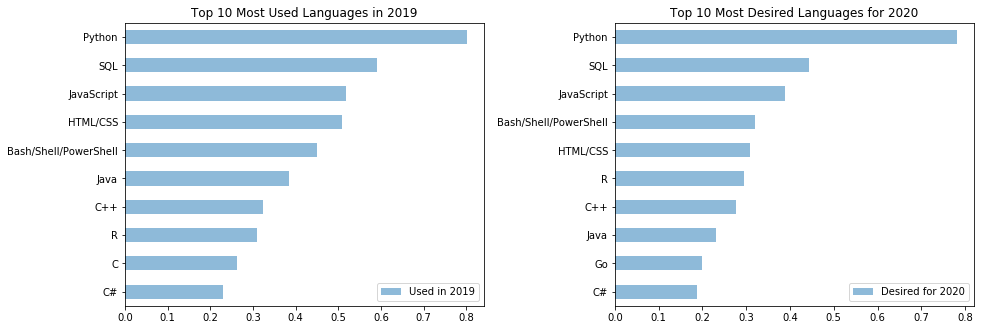

In [5]:
# TOP 10 LANGUAGES

columns=['LanguageWorkedWith', 'LanguageDesireNextYear']
legends=['Used in 2019', 'Desired for 2020']
titles=['Top 10 Most Used Languages in 2019', 'Top 10 Most Desired Languages for 2020']

plot = ranking(df_2019_clean_DS, columns, legends)

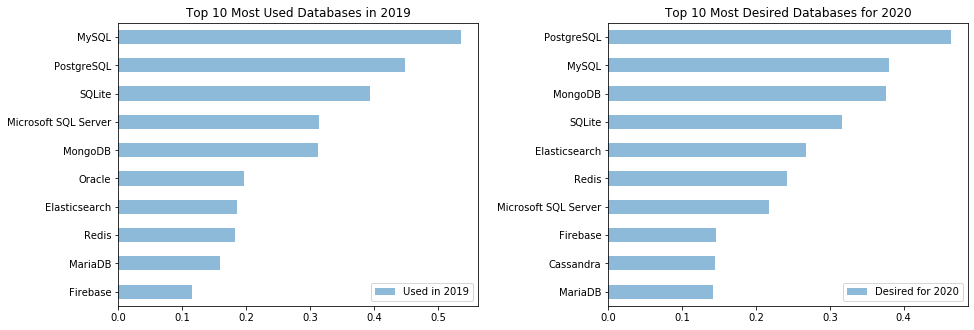

In [6]:
# TOP 10 DATABASES

columns=['DatabaseWorkedWith', 'DatabaseDesireNextYear']
legends=['Used in 2019', 'Desired for 2020']
titles=['Top 10 Most Used Databases in 2019', 'Top 10 Most Desired Databases for 2020']

plot = ranking(df_2019_clean_DS, columns, legends)

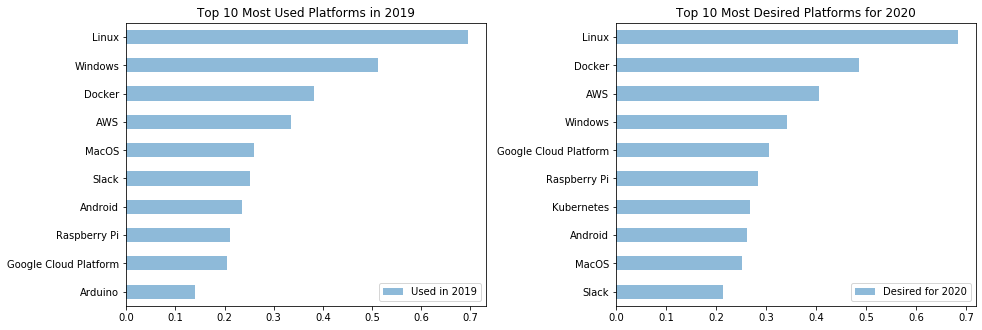

In [7]:
# TOP 10 PLATFORMS

columns=['PlatformWorkedWith', 'PlatformDesireNextYear']
legends=['Used in 2019', 'Desired for 2020']
titles=['Top 10 Most Used Platforms in 2019', 'Top 10 Most Desired Platforms for 2020']

plot = ranking(df_2019_clean_DS, columns, legends)

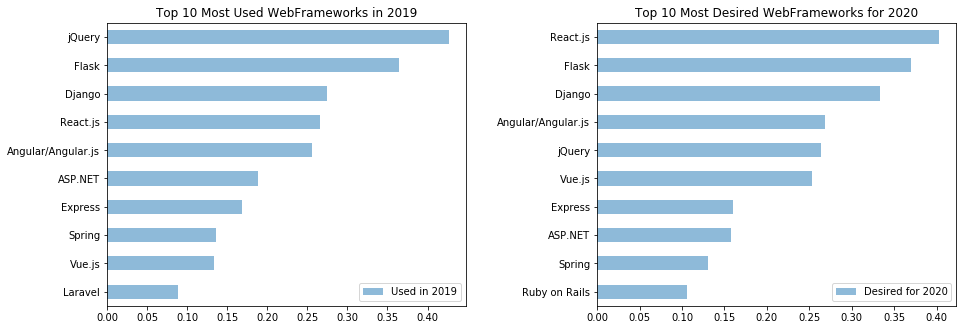

In [8]:
# TOP 10 WEBFRAMEWORKS

columns=['WebFrameWorkedWith', 'WebFrameDesireNextYear']
legends=['Used in 2019', 'Desired for 2020']
titles=['Top 10 Most Used WebFrameworks in 2019', 'Top 10 Most Desired WebFrameworks for 2020']

plot = ranking(df_2019_clean_DS, columns, legends)

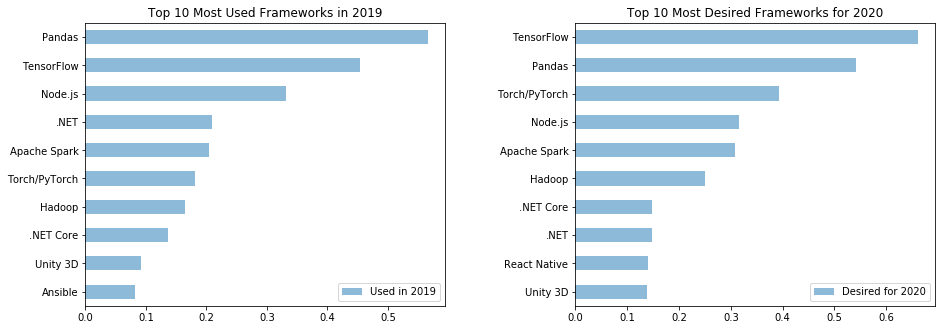

In [9]:
# TOP 10 FRAMEWORKS

columns=['MiscTechWorkedWith', 'MiscTechDesireNextYear']
legends=['Used in 2019', 'Desired for 2020']
titles=['Top 10 Most Used Frameworks in 2019', 'Top 10 Most Desired Frameworks for 2020']

plot = ranking(df_2019_clean_DS, columns, legends)

# Analyzing Salaries

In [10]:
# Cleaning missing values of Annual Salary ('ConvertedComp') column

df_2019_DS_Salary = df_2019_clean_DS.dropna(subset=['ConvertedComp'])

Text(0.5, 1.0, 'Annual Salaries (USD) Distribuition of Data Scientists and Machine Learning Specialists')

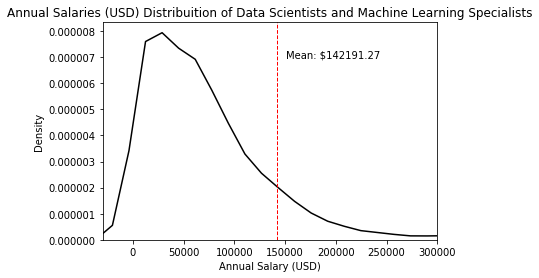

In [11]:
# Plotting the mean salary and salaries distribuition of Data Scientists and Machine Learning Specialists

plt.xlim(-30000,300000)
sns.distplot(df_2019_DS_Salary['ConvertedComp'], hist = False, color='k', bins=200)
plt.xlabel('Annual Salary (USD)')
plt.ylabel('Density')
plt.axvline(df_2019_DS_Salary['ConvertedComp'].mean(), color='r', linestyle='dashed', linewidth=1)
plt.annotate('Mean: ${:.2f}'.format(df_2019_DS_Salary['ConvertedComp'].mean()), xy=(151000, 0.000007))
plt.title('Annual Salaries (USD) Distribuition of Data Scientists and Machine Learning Specialists')